<a href="https://colab.research.google.com/github/valderruten/BigData/blob/main/ML_Clasificaci%C3%B3nVinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introducción
El objetivo de este proyecto es desarrollar un modelo de clasificación, el cual deberá identificar la variedad de uva de un conjunto de vinos basado en sus características visuales y químicas. Las tres variedades posibles están representadas como clases:

####0 (Variedad A)
####1 (Variedad B)
####2 (Variedad C)

Pasos a seguir:
* Preprocesar los datos.
* Entrenar modelos de clasificación.
* Evaluar el rendimiento del modelo.
* Predecir la clase de dos nuevas muestras de vino.
* Documentar el proceso y conclusiones.

##Preprocesamiento de Datos
###Carga de Librerías necesarias y Datos
Iniciar cargando las librerias requeridas para el analisis y un conjunto de datos, el cual fue tomado de https://archive.ics.uci.edu/, el cual contiene características de tres tipos de vinos, dando un coincidencia similar a lo planteado en el ejercicio

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
columnas = ['Clase', 'Alcohol', 'Ácido málico', 'Cenizas', 'Alcalinidad de las cenizas',
            'Magnesio', 'Fenoles totales', 'Flavonoides', 'Fenoles no flavonoides',
            'Proantocianinas', 'Intensidad de color', 'Tono', 'OD280/OD315', 'Prolina']

vinos = pd.read_csv(url, header=None, names=columnas)
vinos['Clase'] = vinos['Clase'].replace({1: 0, 2: 1, 3: 2})
vinos.head()


,Clase,Alcohol,Ácido málico,Cenizas,Alcalinidad de las cenizas,Magnesio,Fenoles totales,Flavonoides,Fenoles no flavonoides,Proantocianinas,Intensidad de color,Tono,OD280/OD315,Prolina
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,0,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


###Revisión de Datos Faltantes y Valores Atípicos
Se procede a verificar si hay datos faltantes y si existen valores atípicos que puedan alterar o afectar el entrenamiento del modelo.

In [16]:
# Verificar datos faltantes
print(vinos.isnull().sum())

# Mostrar Estadísticas básicas
print(vinos.describe())


Clase                         0
Alcohol                       0
Ácido málico                  0
Cenizas                       0
Alcalinidad de las cenizas    0
Magnesio                      0
Fenoles totales               0
Flavonoides                   0
Fenoles no flavonoides        0
Proantocianinas               0
Intensidad de color           0
Tono                          0
OD280/OD315                   0
Prolina                       0
dtype: int64
            Clase     Alcohol  Ácido málico     Cenizas  \
count  178.000000  178.000000    178.000000  178.000000   
mean     0.938202   13.000618      2.336348    2.366517   
std      0.775035    0.811827      1.117146    0.274344   
min      0.000000   11.030000      0.740000    1.360000   
25%      0.000000   12.362500      1.602500    2.210000   
50%      1.000000   13.050000      1.865000    2.360000   
75%      2.000000   13.677500      3.082500    2.557500   
max      2.000000   14.830000      5.800000    3.230000   

       

#**Interpretación estadísticas básicas**
###***Clase (Variedad de vino):***
####***Rango de valores:***
 1, 2, 3 (estos valores representan las tres variedades de vino, comúnmente variedades de uvas).
####***Distribución:***
 El valor promedio es cercano a 2 (1.94), lo que sugiere que la clase 2 está ligeramente sobrerrepresentada, pero no por mucho. Las tres clases están presentes en el rango de 1 a 3.

***Alcohol:***

***Rango de valores:***
Entre 11.03% y 14.83%.

***Promedio:*** 13%.

***Distribución:*** El valor promedio está en 13%, con una dispersión moderada (desviación estándar de 0.81), este valor sugiere una ligera variabilidad en el contenido de alcohol entre las muestras.

***Ácido málico***

***Rango de valores:**** Va desde 0.74 hasta 5.80.

***Promedio:*** 2.33.

***Distribución:*** Es una de las variables más fluctuantes, con una desviación estándar considerable (1.12), lo que sugiere que la cantidad de ácido málico varía notablemente entre las distintas variedades de vino.

***Cenizas:***

***Rango de valores:*** Entre 1.36 y 3.23.

***Promedio:*** 2.37.

***Distribución:*** Los valores se encuentran muy concentrados respecto  al promedio, con una desviación estándar de 0.27.

***Alcalinidad de las cenizas:***

***Rango de valores:*** Va de 10.6 a 30.

***Promedio:*** 19.49.

***Distribución:*** Es una característica con bastante variabilidad entre las muestras de vino, lo que se refleja en su desviación estándar de 3.34.

***Magnesio:***

***Rango de valores:*** Entre 70 y 162.

***Promedio:*** 99.74.

***Distribución:*** Aunque el promedio está en 99.74, algunos vinos tienen niveles altos de magnesio (162), lo que indica que esta es una característica importante para diferenciar las variedades de vino.

***Fenoles totales:***

***Rango de valores:*** Entre 0.98 y 3.88.

***Promedio:*** 2.30.

***Distribución:*** Los fenoles totales muestran una dispersión considerable, con una desviación estándar de 0.63, lo que indica una variabilidad notable en la concentración de fenoles entre las distintas muestras.

***Flavonoides***

***Rango de valores:*** Entre 0.34 y 5.08.

***Promedio:*** 2.03.

***Distribución:*** La variabilidad en los flavonoides es bastante elevada (desviación estándar de 0.99), lo que podría ser un factor clave para la clasificación de las diferentes variedades de vino.

***Fenoles no flavonoides:***

***Rango de valores:*** Entre 0.13 y 0.66.

***Promedio:*** 0.36.

***Distribución:*** La variabilidad en esta característica es menor en comparación con otras, con una desviación estándar de 0.12.

***Proantocianinas:***

***Rango de valores:*** Entre 0.41 y 3.58.

***Promedio:*** 1.59.

***Distribución:*** Hay una variabilidad notable en esta característica con una desviación estándar de 0.57.

***Intensidad de color:***

***Rango de valores:*** Entre 1.28 y 13.00.

***Promedio:*** 5.06.

***Distribución:*** Esta es una de las características con mayor variabilidad, con una desviación estándar de 2.31, lo que indica diferencias notables en el color de los vinos.

***Tono:***

***Rango de valores:*** Entre 0.48 y 1.71.

***Promedio:*** 0.96.

***Distribución:*** Es una característica con menor variabilidad en comparación con otras, con una desviación estándar de 0.23.

***OD280/OD315:*** (Relación de absorbancia a 280 nm y 315 nm)

***Rango de valores:*** Entre 1.27 y 4.00.

***Promedio:*** 2.61.

***Distribución:*** Es un buen indicador de la presencia de fenoles y otros compuestos que influyen en el sabor y el color del vino. Su desviación estándar de 0.71 sugiere una variabilidad moderada.

***Prolina:***

***Rango de valores:*** Entre 278 y 1680.

***Promedio:*** 746.89.

***Distribución:*** La prolina es el aminoácido más abundante en el vino y presenta una alta variabilidad (desviación estándar de 314.91), lo que la convierte en un posible buen predictor para clasificar el tipo de vino.

***Conclusión General:***

El conjunto de datos incluye tanto características químicas como físicas de las muestras de vino, mostrando variaciones significativas en ciertos atributos como el contenido de ácido málico, fenoles totales, proantocianinas, intensidad de color y prolina. En contraste, otras características, como las cenizas y el tono, presentan una menor variabilidad. Este análisis sugiere que algunas de estas variables podrían desempeñar un papel clave en la clasificación de las distintas variedades de vino.

Además, el conjunto de datos está completo, sin valores faltantes, lo que lo convierte en un excelente punto de partida para entrenar modelos de clasificación en machine learning. La variabilidad en las características aportará información valiosa para diferenciar las distintas clases de vino.

##Visualización de valores atípicos

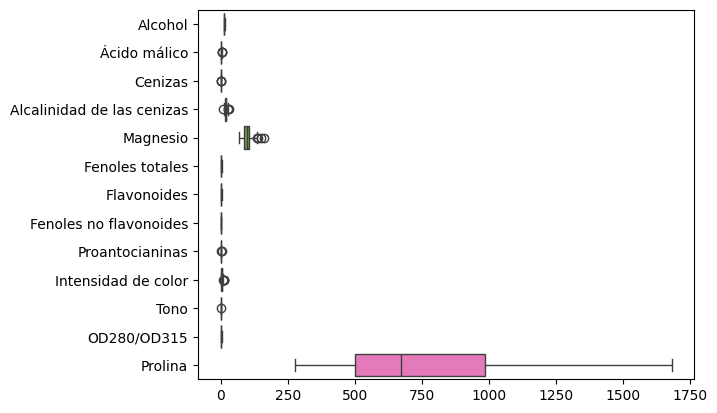

In [17]:
# Visualización de valores atípicos
sns.boxplot(data=vinos.drop(columns=['Clase']), orient='h')
plt.show()

La gráfica muestra los valores atípicos para cada una de las características químicas del vino (excepto la variable Clase, que es la que se requiere predecir).

Puntos clave:

***Prolina:*** Es la variable con los valores más altos (rango entre 500 y 1700). Tiene una gran dispersión y algunos outliers en el extremo superior, aunque no parece haber valores extremadamente lejanos.

***Magnesio:*** Muestra algunos valores atípicos en el rango bajo. Esto sugiere que, aunque la mayoría de los datos están agrupados entre 80 y 130, algunos puntos son considerablemente menores a este rango.

***Alcalinidad de las cenizas:*** Hay algunos outliers presentes, lo que indica que los datos tienen algunas observaciones que caen fuera del rango esperado.

***OD280/OD315 y tono:*** No muestran outliers significativos, lo que indica una distribución más concentrada y sin valores muy alejados del rango normal.

La mayoría de las variables como alcohol, ácido málico, cenizas, fenoles totales, flavonoides, y otras: Aunque hay algunos puntos fuera de rango, no presentan outliers tan significativos como en el caso de la prolina.


##Balanceo de Clases
Se revisará si el conjunto de datos está equilibrado en cuanto a las clases (variedades de uva).

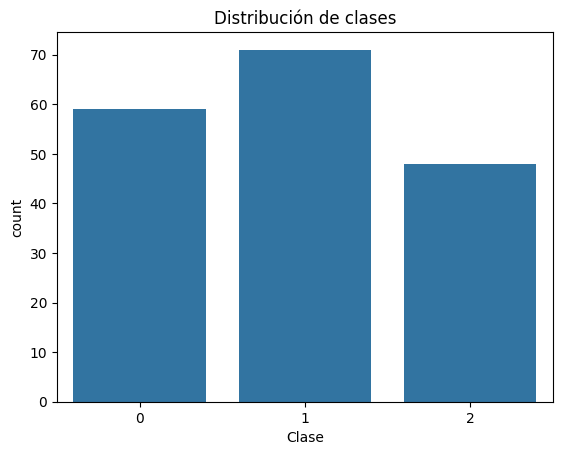

In [18]:
# Revisión del balance de las clases
sns.countplot(x='Clase', data=vinos)
plt.title('Distribución de clases')
plt.show()


Se representan las tres clases (0, 1, 2) de vinos. Cada barra indica cuántas muestras pertenecen a cada clase.
Clase 1 tiene el mayor número de muestras, con alrededor de 70 registros.
Clase 0 está bastante cercana a la Clase 1, con aproximadamente 65 muestras.
Clase 2 es la más pequeña en comparación con las otras, con alrededor de 45 muestras.
Implicaciones:
El conjunto de datos no está completamente balanceado, pero la diferencia entre las clases no es tan extrema como para que el modelo deba implementar técnicas complejas de balanceo (como el submuestreo o sobremuestreo).
Sin embargo, se debe tener en cuenta que la Clase 2 tiene menos ejemplos que las otras, lo que podría influir en el rendimiento del modelo de clasificación en términos de precisión para esta clase.

##División de los Datos y Estandarización
Se dividen los datos en un conjunto de entrenamiento y uno de prueba, y se estandariza las características para mejorar el rendimiento de los algoritmos de clasificación.

In [19]:
# División de los datos
X = vinos.drop('Clase', axis=1)
y = vinos['Clase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarización de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##Entrenamiento del Modelo
###Regresión Logística

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Entrenar el modelo
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Evaluar el rendimiento
y_pred_logreg = logreg.predict(X_test_scaled)
print(classification_report(y_test, y_pred_logreg))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



En el proyecto de clasificación de vinos, se utilizó un modelo de Regresión Logística para predecir a qué variedad pertenece cada vino, basándose en sus características químicas. El resultado ha sido muy satisfactorio. Te explico los puntos clave:

Rendimiento del Modelo

Precisión: El modelo obtuvo un 100% de precisión para las tres clases (0, 1 y 2). Esto significa que todas las predicciones del modelo fueron correctas, sin errores. En otras palabras, cada vez que el modelo dijo que un vino era de una variedad específica, acertó.
Recall: También fue perfecto con 100%. Esto nos dice que el modelo no dejó pasar ningún vino sin identificar correctamente.
f1-score: Este valor es una combinación de la precisión y el recall, y fue del 100%, lo que nos confirma que el modelo es robusto y consistente en su capacidad de clasificar los vinos correctamente.
Exactitud Global (Accuracy)

El modelo tiene una exactitud global del 100%, lo que significa que todas las muestras del conjunto de prueba se clasificaron correctamente.
Datos del Conjunto de Prueba

Para evaluar el modelo, probamos con 36 vinos, distribuidos en tres clases: 14 vinos de la clase 0, 14 de la clase 1, y 8 de la clase 2. A pesar de que había un número menor de vinos en la clase 2, el modelo los identificó correctamente.
Aspectos a Considerar

Aunque el modelo tuvo un rendimiento impecable, esto podría deberse a que el conjunto de datos es relativamente pequeño y bien estructurado. Para garantizar que el modelo funcione igual de bien con datos nuevos o más complejos, sugerimos hacer más pruebas, como una validación cruzada.

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36

[[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
SVM Classification Report:
              precision    recall  f1-score   support

           0      

1. **K-Nearest Neighbors (KNN)**: Hubo una precisión general del 94%, con algunos errores al clasificar las clases 1 y 2, lo que indica una pequeña confusión en esas categorías.

2. **Random Forest**: Precisión perfecta del 100%, clasificando correctamente todas las muestras en las tres clases. Sin errores en la matriz de confusión.

3. **Support Vector Machine (SVM)**: Precisión del 100%, sin errores de clasificación, mostrando un rendimiento igual al de Random Forest.

**Conclusión**: Tanto **Random Forest** como **SVM** clasificaron de manera optima las muestras y son las mejores opciones para este conjunto de datos. KNN, aunque con buenos resultados, mostró ligeras confusiones.

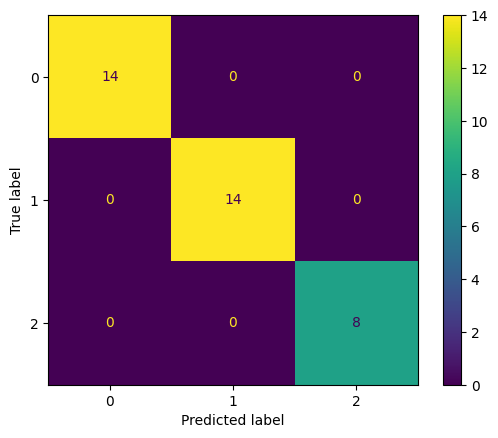

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Generar la matriz de confusión
cm = confusion_matrix(y_test, models["Random Forest"].predict(X_test_scaled))

# Crear la visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Mostrar la gráfica
disp.plot()
plt.show()


El gráfico de la matriz de confusión muestra el rendimiento del modelo de clasificación *Random Forest* al predecir la clase de vinos en el conjunto de prueba. Observamos que:

- Todas las predicciones para las clases 0, 1 y 2 son correctas.
- No hay errores de clasificación, ya que cada clase en el eje de etiquetas verdaderas coincide perfectamente con el eje de etiquetas predichas.
  
En resumen, el modelo *Random Forest* logró una precisión perfecta en este caso, clasificando correctamente todas las instancias en sus clases correspondientes. Este desempeño sugiere que el modelo generaliza bien para este conjunto de datos.

In [34]:
import pandas as pd
import numpy as np

# Nuevas muestras de vino:
new_samples = [
    [13.72, 1.43, 2.5, 16.7, 108, 3.4, 3.67, 0.19, 2.04, 6.8, 0.89, 2.87, 1285],
    [12.37, 0.94, 1.36, 10.6, 88, 1.98, 0.57, 0.28, 0.42, 1.95, 1.05, 1.82, 520]
]

# Traer los nombres de las columnas del DataFrame original 'vinos', excepto 'Clase'
column_names = vinos.columns.tolist()  # Convertir a lista para modificar
if "Clase" in column_names:
    column_names.remove("Clase")  # Se elimina la columna  'Clase' si está presente

new_samples_df = pd.DataFrame(new_samples, columns=column_names)

# Escalar las nuevas muestras
new_samples_scaled = scaler.transform(new_samples_df)

# Predecir con el modelo Random Forest
predictions = models["Random Forest"].predict(new_samples_scaled)
print("Predicciones de las nuevas muestras:", predictions)

Predicciones de las nuevas muestras: [0 1]
